In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-analytics-job-change-of-data-scientists/sample_submission.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_test.csv
/kaggle/input/hr-analytics-job-change-of-data-scientists/aug_train.csv


### Importing the necessary libraries

In [17]:
import warnings 
warnings.filterwarnings('ignore')

In [18]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
cmap = sns.cm.mako_r

%matplotlib inline

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Importing the Data using Pandas

In [19]:
aug_train = pd.read_csv('../input/hr-analytics-job-change-of-data-scientists/aug_train.csv')

In [20]:
aug_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [21]:
aug_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [22]:
aug_train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

As we can see that there are a lot of missing values and most of them are Categorical and it is not feasible to fill those values as we may end up providing completly wrong data to the training set. So, I prefer dropping them instead.

### Drop NA values

In [23]:
aug_train.dropna(inplace=True)

## EDA

In [24]:
# Function to Plot Bar Graph
def plot_bar_graph(column, order=None):
    x = aug_train[column].value_counts().index
    y = aug_train[column].value_counts().values
    sns.barplot(x, y, order=order)
     
# Funtion to Plot Pie Chart
def plot_pie_chart(column, title=''):
    values = aug_train[column].value_counts().values
    labels = aug_train[column].value_counts().index
    plt.figure(figsize=(6,6))
    plt.title(title)
    plt.pie(x=values, labels=labels, autopct='%1.2f%%')

### Pie Chart for Gender

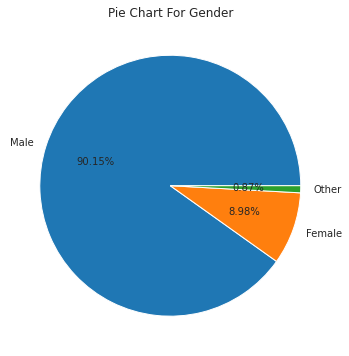

In [25]:
plot_pie_chart('gender', title='Pie Chart For Gender')
plt.show()

As we can see that most of the Candidates working are Male

### Pie Chart for Relevent Experience

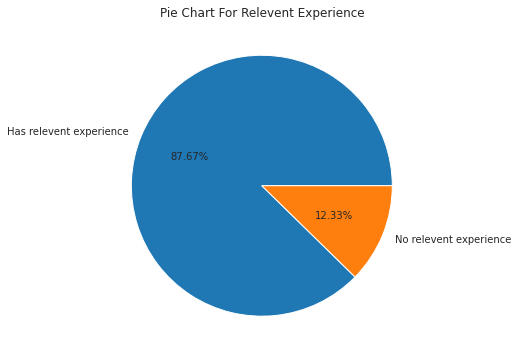

In [26]:
plot_pie_chart('relevent_experience', title='Pie Chart For Relevent Experience')
plt.show()

### Pie Chart for Enrolled University

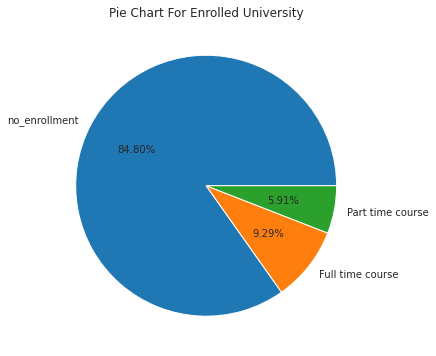

In [27]:
plot_pie_chart('enrolled_university', title='Pie Chart For Enrolled University')
plt.show()

### Pie Chart Education Level

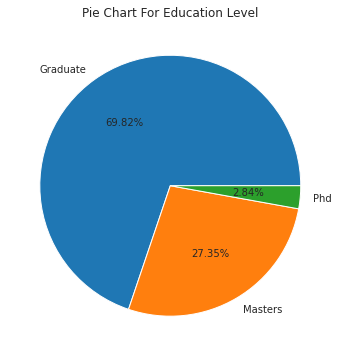

In [28]:
plot_pie_chart('education_level', title='Pie Chart For Education Level')
plt.show()

### Bar chart for Major Discipline

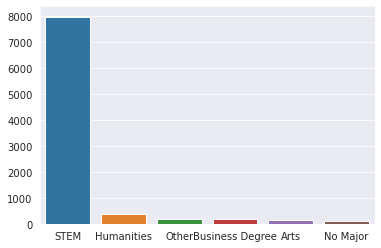

In [29]:
plot_bar_graph('major_discipline')
plt.show()

Most of the Candidates are from STEM. That is their major discipline was in one of the Following:

Science,
Technology,
Engineering and
Mathematics

### Bar chart for Company Size

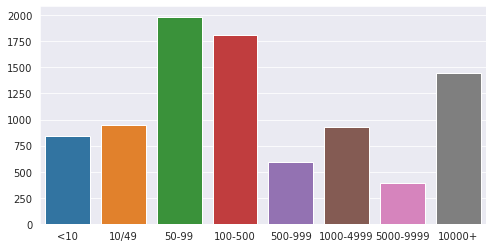

In [30]:
plt.figure(figsize=(8, 4))
order = ['<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
plot_bar_graph('company_size', order=order)
plt.show()

### Bar chart for Company Type

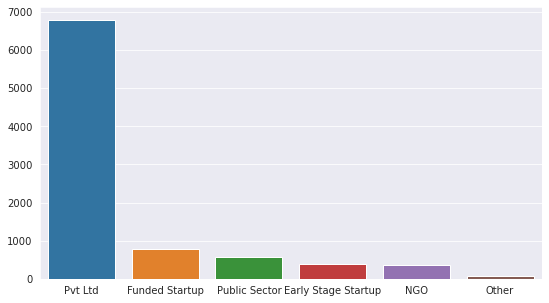

In [31]:
plt.figure(figsize=(9, 5))
plot_bar_graph('company_type')
plt.show()

### How many Jobs Candidates Worked before joining the current company

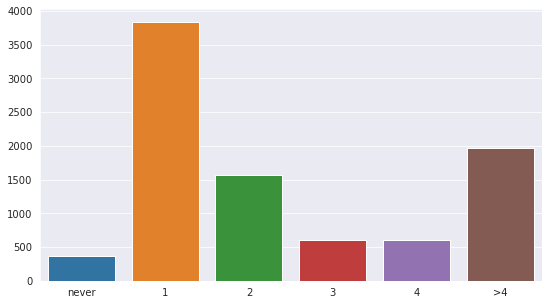

In [32]:
plt.figure(figsize=(9, 5))
order = ['never', '1', '2', '3', '4', '>4']
plot_bar_graph('last_new_job', order=order)
plt.show()

### Let's play a Histogram to see the Distribution of the Training Hours

<AxesSubplot:xlabel='training_hours', ylabel='Count'>

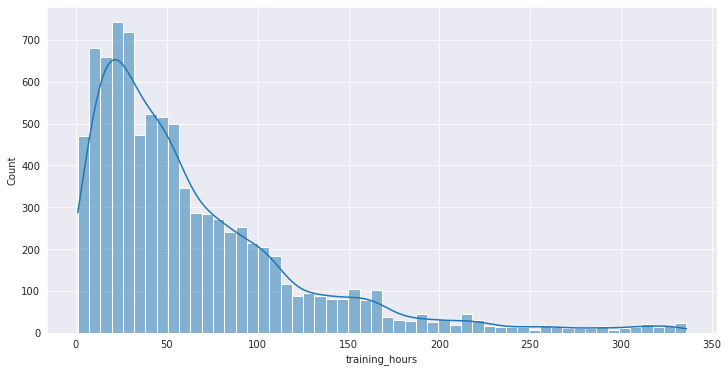

In [33]:
plt.figure(figsize=(12, 6))
sns.histplot(aug_train['training_hours'], kde=True)

The graph reveals the most of the Candidates train for 20 to 50 Hours

Before moving on to the prediction part we will check relation between few features and Training Hours, as people looking for a Job Change tend to Train for longer hours.
Relevent Experience vs Training Hours

Education Level vs Training Hours

Major Discipline vs Training Hours

Company Size vs Training Hours

Company Type vs Training Hours

Last New Job vs Training Hours

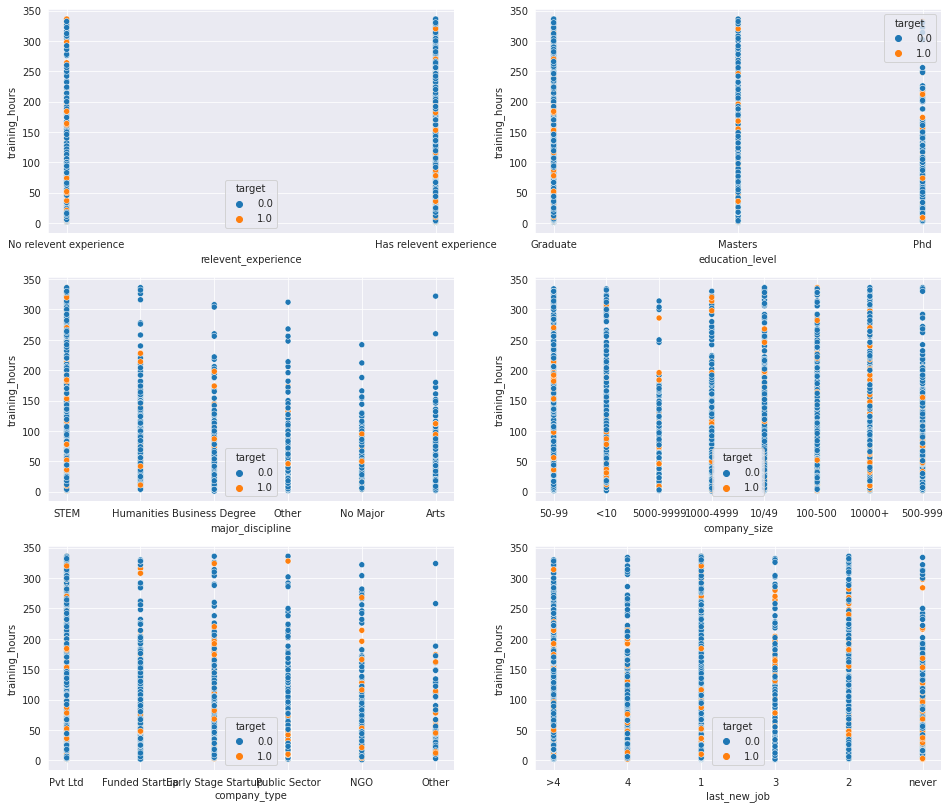

In [34]:
figures, axes = plt.subplots(3, 2, figsize=(16, 14))

sns.scatterplot('relevent_experience', 'training_hours', data=aug_train, hue='target', ax=axes[0,0])
sns.scatterplot('education_level', 'training_hours', data=aug_train, hue='target', ax=axes[0,1])
sns.scatterplot('major_discipline', 'training_hours', data=aug_train, hue='target', ax=axes[1,0])
sns.scatterplot('company_size', 'training_hours', data=aug_train, hue='target', ax=axes[1,1])
sns.scatterplot('company_type', 'training_hours', data=aug_train, hue='target', ax=axes[2,0])
sns.scatterplot('last_new_job', 'training_hours', data=aug_train, hue='target', ax=axes[2,1])

plt.show()

## Data Preprocessing Phase

In [35]:
# Using pandas get_dummies() to convert the Categorical Data to Numerical Features
# Then Removing the Unnecessary Columns

list_of_columns = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level',
                   'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']

aug_train_dummies_df = []

for col in list_of_columns:
    dummy_train_df = pd.get_dummies(aug_train[col])
    aug_train_dummies_df.append(dummy_train_df)



list_of_columns.append('enrollee_id')    

aug_train_dummies_df.insert(0, aug_train.drop(columns=list_of_columns))

aug_train = pd.concat(aug_train_dummies_df,axis=1)

### Dataset split

In [36]:
X = aug_train.dropna().drop(columns=['target']).values
y = aug_train.dropna()['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=80)

Accuracy of the Model is 0.8652772608857462


## Model Pipeline

In [ ]:
pipeline = make_pipeline(StandardScaler(), SVC(kernel='sigmoid'))
pipeline.fit(X_train, y_train)
prediction = pipeline.predict(X_test)

print(f'Accuracy of the Model is {accuracy_score(y_test, prediction)}')

###  Confussion Matrix

[]

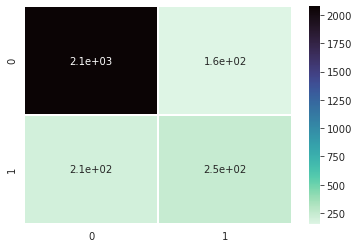

In [37]:
conf_matrix = confusion_matrix(y_test, prediction)
sns.heatmap(conf_matrix, linewidths=1, cmap=cmap, annot=True)
plt.plot()